<a target="_blank" href="https://colab.research.google.com/github/LBL-EESA/fastkde/blob/main/examples/fastKDE%20and%20xarray.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

This notebook demonstrates basic usage of `fastkde.plot` with `xarray`.

In [1]:
import numpy as np

try:
    import fastkde
    import xarray
except:
    # install fastkde
    !pip install --upgrade fastkde
    import fastkde

import matplotlib.pyplot as plt

For this example, we will generate data with the following relationships:

$$ x := \mathcal{N}(0,\pi)$$
$$ y := \mathcal{N}(\sin(x), 1)$$

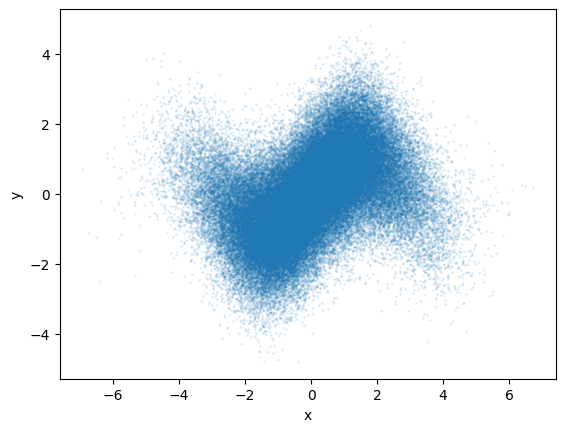

In [2]:
""" Sample the two variables """
N = int(1e5)
x = np.random.normal(size=N, scale=np.pi / 2)
y = np.sin(x) + np.random.normal(scale=1, size=N)

# plot the data
plt.scatter(x, y, s=1, alpha=0.1)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

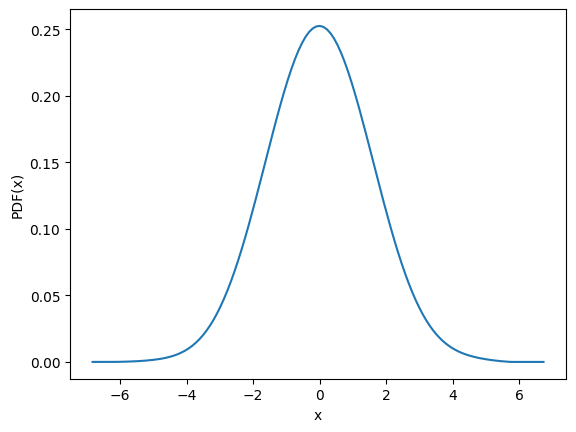

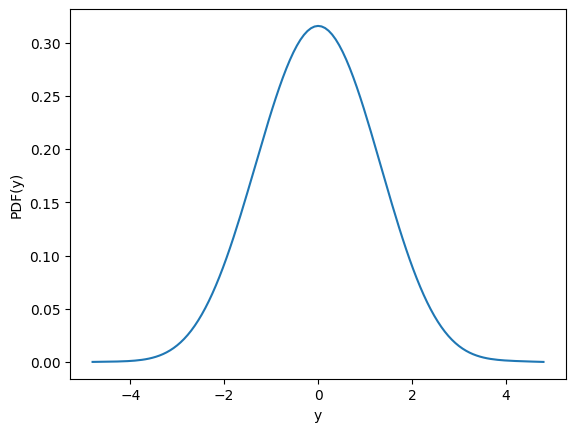

In [3]:
""" Calculate and plot 1D PDFs. """

# calculate the PDFs of x and y
pdf_x = fastkde.pdf(x, var_names=["x"])
pdf_y = fastkde.pdf(y, var_names=["y"])

# plot PDF(x)
pdf_x.plot()
plt.show()

# plot PDF(y)
pdf_y.plot()
plt.show()

In [4]:
""" Compute the 2D PDF. """

pdf = fastkde.pdf(x, y, var_names=["x", "y"])
pdf

<xarray.DataArray (y: 129, x: 128)>
array([[5.15341562e-05, 4.32892020e-05, 2.64177373e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.80907471e-05, 5.90500013e-05, 4.03572607e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.26115712e-05, 7.28890199e-05, 5.26694002e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.57010473e-05, 6.04696273e-05, 5.59007764e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.20063735e-05, 5.41410808e-05, 4.73655710e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.62452175e-05, 4.58700457e-05, 3.71925919e-05]])
Coordinates:
  * x        (x) float64 -6.824 -6.718 -6.611 -6.504 ... 6.408 6.514 6.621 6.728
  * y        (y) float64 -4.803 -4.728 -4.653 -4.578 ... 4.576 4.651 4.726 4.801
Attributes:
    long_name:  PDF(x,y)

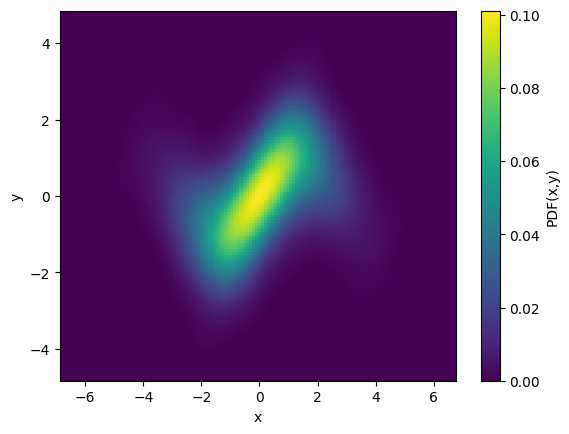

In [5]:
""" Plot the PDF using xarray. """
# plot the 2D pdf
pdf.plot();

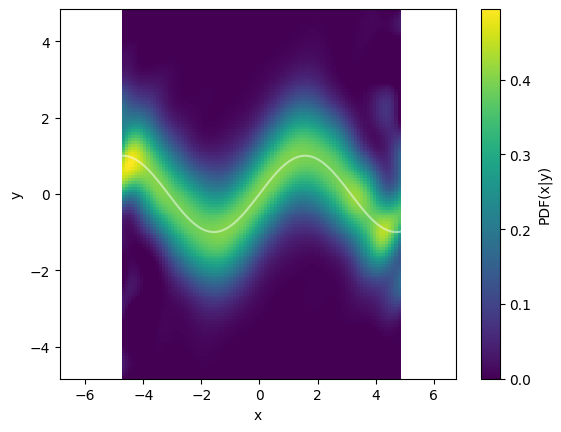

In [6]:
""" Compute and plot the conditional PDF using xarray. """

cpdf = fastkde.conditional(y, x, var_names=["y", "x"])

# plot the conditional
cpdf.plot()

# plot the true conditional mean
plt.plot(cpdf.x, np.sin(cpdf.x), color="white", alpha=0.5);